In [1]:
print("test")

[1] "test"


In [1]:
library(tidyverse)
library(repr)
library(RColorBrewer)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [23]:
set.seed(19)

#loading data -> from Ksenia's notebook
pulsar_data <- read_csv("https://github.com/kseniak1/DSCI100-Group-Project/raw/main/HTRU_2%5B1%5D.csv", col_names = FALSE) %>%
                rename(mean_ip = X1,
                      dev_ip = X2,
                      excess_ip = X3,
                      skewness_ip = X4,
                      mean_dm = X5,
                      dev_dm = X6,
                      excess_dm = X7,
                      skewness_dm = X8,
                      class = X9) %>%
                mutate(class = as.factor(class))

#reduce data
reduced_pulsar <- pulsar_data %>%
    group_by(class) %>%
    sample_n(size = 250)

#split data
pulsar_split <- initial_split(reduced_pulsar) 
pulsar_training <- training(pulsar_split) 
pulsar_testing <- testing(pulsar_split)

#model specs
knn_spec <- nearest_neighbor(weight = 'rectangular', neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#generic recipe
recipe_n <- recipe(class ~., data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#vfold
vfold <- vfold_cv(pulsar_training, v = 5, strata = class)

#k values
k_values <- tibble(neighbors = seq(from = 1, to = 10))

#generic workflow

n_fit <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_n) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot
#used template from worksheet classification 2 question 4.2

plot_n <- ggplot(fit_n, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 10, by = 1))


Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



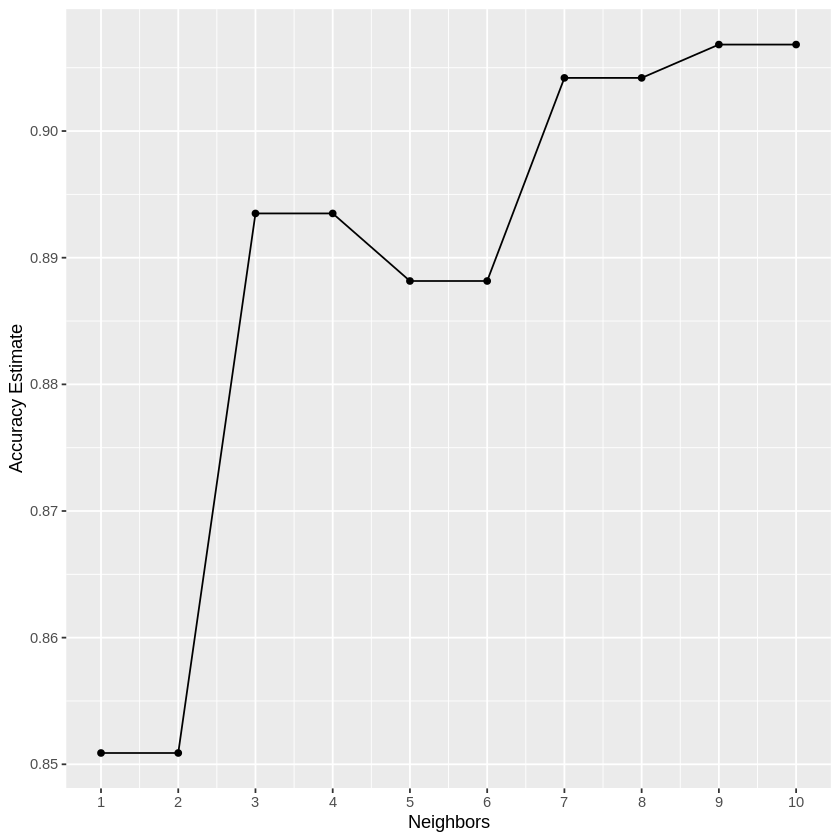

In [26]:
#1: Mean and standard dev (I)

#generic recipe
recipe_1 <- recipe(class ~ mean_ip + dev_ip, data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#generic workflow

fit_1 <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_1) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot
#used template from worksheet classification 2 question 4.2

plot_1 <- ggplot(fit_1, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 10, by = 1))
plot_1

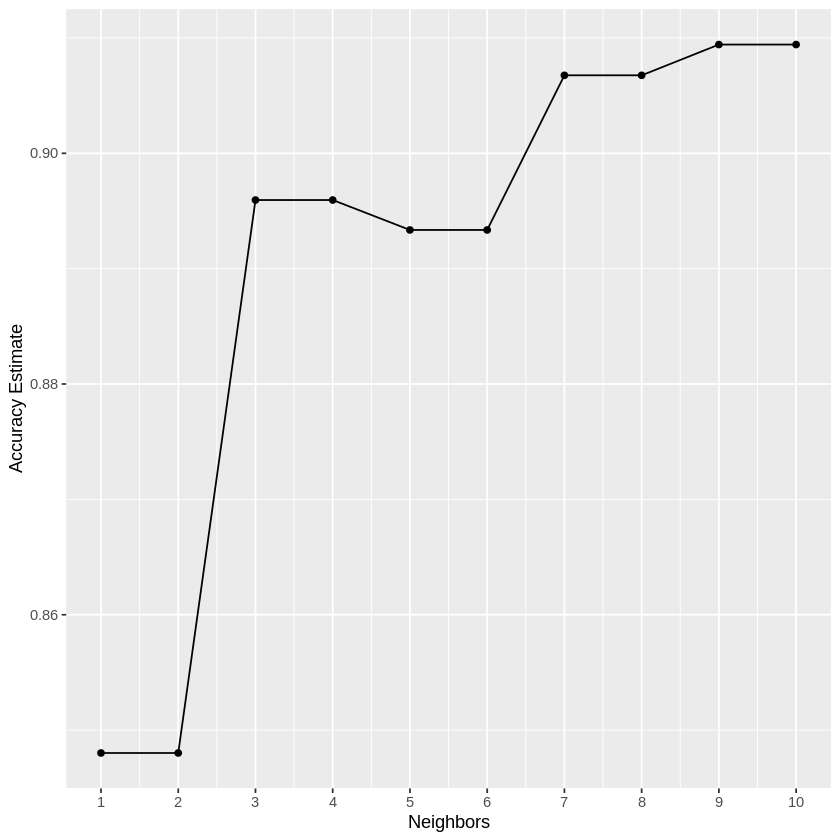

In [27]:
#2: Mean and skewness (I)

#generic recipe
recipe_2 <- recipe(class ~ mean_ip + skewness_ip, data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#generic workflow

fit_2 <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_2) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot

plot_2 <- ggplot(fit_2, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 10, by = 1))
plot_2

In [ ]:
#3: Mean and excess kurtosis (I)

#generic recipe
recipe_3 <- recipe(class ~ mean_ip + excess_ip, data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#generic workflow

fit_3 <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_3) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot

plot_3 <- ggplot(fit_3, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 10, by = 1))

In [ ]:
#4: Mean and standard dev (D)

#generic recipe
recipe_4 <- recipe(class ~ mean_dm + dev_dm, data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#generic workflow

fit_4 <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_4) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot

plot_4 <- ggplot(fit_4, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 10, by = 1))

In [ ]:
#5: Mean and skewness (D)

#generic recipe
recipe_5 <- recipe(class ~ mean_dm + skewness_dm, data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#generic workflow

fit_5 <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_5) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot

plot_5 <- ggplot(fit_5, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 10, by = 1))

In [ ]:
#6: Mean and excess kurtosis (D)

#generic recipe
recipe_6 <- recipe(class ~ mean_dm + excess_dm, data = pulsar_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#generic workflow

fit_6 <- workflow() %>%
    add_model(knn_spec) %>%
    add_recipe(recipe_6) %>%
    tune_grid(resamples = vfold, grid = k_values) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

#k vs accuracy plot

plot_6 <- ggplot(fit_6, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 10, by = 1))